In [1]:
# Import the onnxruntime_genai module and alias it as og
# This module is used for running ONNX models with generative AI capabilities
import onnxruntime_genai as og


In [2]:
# Define the path to the model file
# This path points to a specific ONNX model file stored in a directory
model_path = '../../Models/Phi-3.5-vision-instruct-onnx/cpu_and_mobile/cpu-int4-rtn-block-32-acc-level-4'
            #   ../../Models/Phi-3-mini-128k-instruct-onnx/cpu_and_mobile/cpu-int4-rtn-block-32/genai_config.json
# Define the path to the image file
# This path points to an image file that will be used for demonstration or testing
img_path = './imgs/demo.png'

In [3]:
config =og.Config(model_path)
config.clear_providers()
# Create an instance of the Model class from the onnxruntime_genai module
# This instance is initialized with the path to the model file
model = og.Model(config)

# # Create a multimodal processor using the model instance
# # This processor will handle different types of input data (e.g., text, images)
# processor = model.create_multimodal_processor()

processor = model.create_multimodal_processor()
tokenizer_stream = processor.create_stream()


In [4]:
# Define a string variable containing the text prompt
# This prompt instructs to create Python code for an image and save it using matplotlib (plt)
text = "Please create Python code for image, and use plt to save the new picture under imgs/ and name it phi-3-vision.jpg."

In [5]:
# Initialize a string variable for the prompt with a user tag
prompt = "<|user|>\n"

# Append an image tag to the prompt
prompt += "<|image_1|>\n"

# Append the text prompt to the prompt string, followed by an end tag
prompt += f"{text}<|end|>\n"

# Append an assistant tag to the prompt, indicating the start of the assistant's response
prompt += "<|assistant|>\n"

In [6]:
# Open the image file using the Images class from the onnxruntime_genai module
# The img_path variable contains the path to the image file
image = og.Images.open(img_path)

In [7]:
# Process the prompt and the image using the multimodal processor
# The processor function takes the prompt and the image as inputs
# The result is stored in the inputs variable, which will be used for further processing or model inference
inputs = processor(prompt, images=image)

In [8]:
# Create an instance of the GeneratorParams class from the onnxruntime_genai module
# This instance is initialized with the model object
params = og.GeneratorParams(model)

# Set the inputs for the generator parameters using the processed inputs
params.set_inputs(inputs)

# Set the search options for the generator parameters
# The max_length parameter specifies the maximum length of the generated output
params.set_search_options(max_length=3072)

In [9]:
# Create an instance of the Generator class from the onnxruntime_genai module
# This instance is initialized with the model and the generator parameters
generator = og.Generator(model, params)

In [10]:
# Initialize an empty string variable to store the generated code
code = ''

In [11]:
# Loop until the generator has finished generating tokens
while not generator.is_done():
    # Compute the logits (probabilities) for the next token
    generator.compute_logits()
    
    # Generate the next token based on the computed logits
    generator.generate_next_token()

    # Retrieve the newly generated token
    new_token = generator.get_next_tokens()[0]
    
    # Decode the new token and append it to the code string
    code += tokenizer_stream.decode(new_token)
    
    # Print the decoded token to the console without a newline, and flush the output buffer
    print(tokenizer_stream.decode(new_token), end='', flush=True)
        

```python
import matplotlib.pyplot as plt

# Data to plot
subjects = ['physics', 'chemistry', 'english', 'maths']
marks = [85, 55, 45, 100]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(marks, labels=subjects, autopct='%1.1f%%', startangle=140, colors=['blue', 'cyan', 'yellow', 'magenta'])

# Set the title of the pie chart
ax.set_title('Marks obtained in an exam')

# Save the figure
plt.savefig('imgs/phi-3-vision.jpg', format='jpg')

# Note: plt.show() is not used as per the instruction
```

This code will generate a pie chart with the given data and save it as 'imgs/phi-3-vision.jpg' without displaying it.

In [12]:
# The variable 'code' contains the generated code as a string
code


"```python\nimport matplotlib.pyplot as plt\n\n# Data to plot\nsubjects = ['physics', 'chemistry', 'english', 'maths']\nmarks = [85, 55, 45, 100]\n\n# Create a pie chart\nfig, ax = plt.subplots()\nax.pie(marks, labels=subjects, autopct='%1.1f%%', startangle=140, colors=['blue', 'cyan', 'yellow', 'magenta'])\n\n# Set the title of the pie chart\nax.set_title('Marks obtained in an exam')\n\n# Save the figure\nplt.savefig('imgs/phi-3-vision.jpg', format='jpg')\n\n# Note: plt.show() is not used as per the instruction\n```\n\nThis code will generate a pie chart with the given data and save it as 'imgs/phi-3-vision.jpg' without displaying it."

In [13]:
# Find the starting index of the Python code block within the generated code
# The index function locates the substring '```python' and adds 9 to skip past it
begin = code.index('```python') + 9

# Slice the code string from the calculated starting index to the end
# This removes the initial part of the string up to and including '```python'
code = code[begin:]


In [14]:
# Find the ending index of the Python code block within the generated code
# The index function locates the substring '```' which marks the end of the code block
end = code.index('```')


In [15]:
# Slice the code string to include only the part up to the ending index
# This removes the trailing part of the string after the end of the code block
code = code[:end]


In [16]:
# The variable 'code' contains the generated code as a string
code


"\nimport matplotlib.pyplot as plt\n\n# Data to plot\nsubjects = ['physics', 'chemistry', 'english', 'maths']\nmarks = [85, 55, 45, 100]\n\n# Create a pie chart\nfig, ax = plt.subplots()\nax.pie(marks, labels=subjects, autopct='%1.1f%%', startangle=140, colors=['blue', 'cyan', 'yellow', 'magenta'])\n\n# Set the title of the pie chart\nax.set_title('Marks obtained in an exam')\n\n# Save the figure\nplt.savefig('imgs/phi-3-vision.jpg', format='jpg')\n\n# Note: plt.show() is not used as per the instruction\n"

In [17]:
# Import the subprocess module
# This module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
import subprocess

In [18]:
# Run the generated Python code as a subprocess
# The subprocess.run function executes the command specified in the list
# The command runs the Python interpreter with the '-c' option to execute the code string
# The capture_output parameter is set to True to capture the standard output and error streams
result = subprocess.run(["python", "-c", code], capture_output=True)


In [19]:
# Import the Image and display functions from the IPython.display module
# The Image function is used to display an image given its file path or URL
# The display function is used to display the image in the output cell of a Jupyter notebook
from IPython.display import Image, display

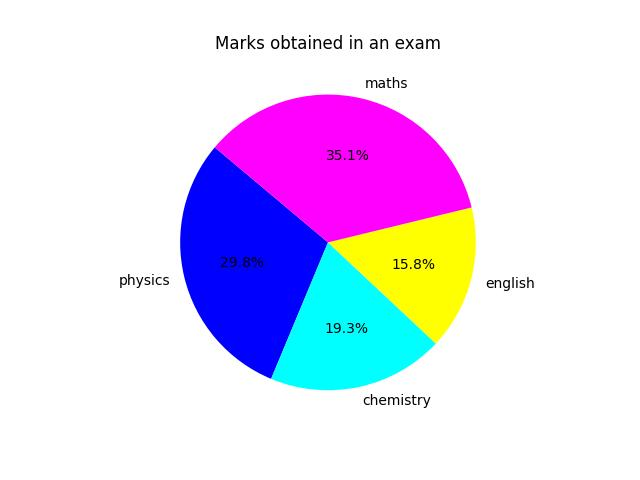

In [20]:
# Display an image in a Jupyter notebook cell
# The Image function creates an image object from a file
# The filename parameter specifies the path to the image file
display(
    Image(filename='./imgs/phi-3-vision.jpg')
)


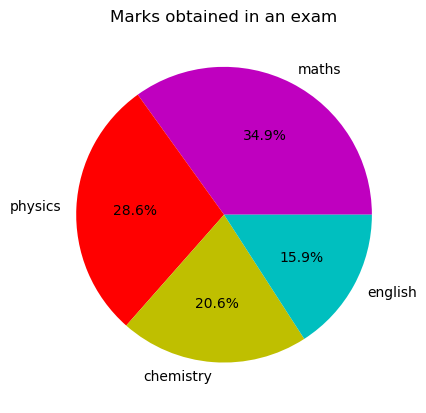

In [21]:
# Display an image in a Jupyter notebook cell
# The Image function creates an image object from a file
# The filename parameter specifies the path to the image file
display(
    Image(filename='./imgs/demo.png'))